## **Part 1.**

# 1. X=np.random.rand(10,3) creates 10x3 2d array, whereas Y=np.random.rand(3) creates 1d array with 3 elements. To be able to add them, we need to convert Y to 2d array with shape (1,3).
**Answer**: e. X+Y[np.newaxis,:]

# 2. What are the dimensionalities of x, y, and z in the two cases:


> a) x is 10x5, y is 10x5, x+y is also 10x5




> b) x is 10x1, y is 1x5, x+y is 10x5





# 3. np.ogrid returns open (i.e., "open-ended") grids for the specified ranges.

*   It generates arrays that can be broadcasted together.
*   It returns arrays with a shape that is suitable for broadcasting in arithmetic operations.
*   It's memory-efficient because it doesn't create the full coordinate grid in memory, instead it creates arrays with just the necessary values.






# 4. Given an array of distances between 10 cities, calculate the distance of each city from every other city and plot it using matplotlib using a colorbar, label the axes, include city names.

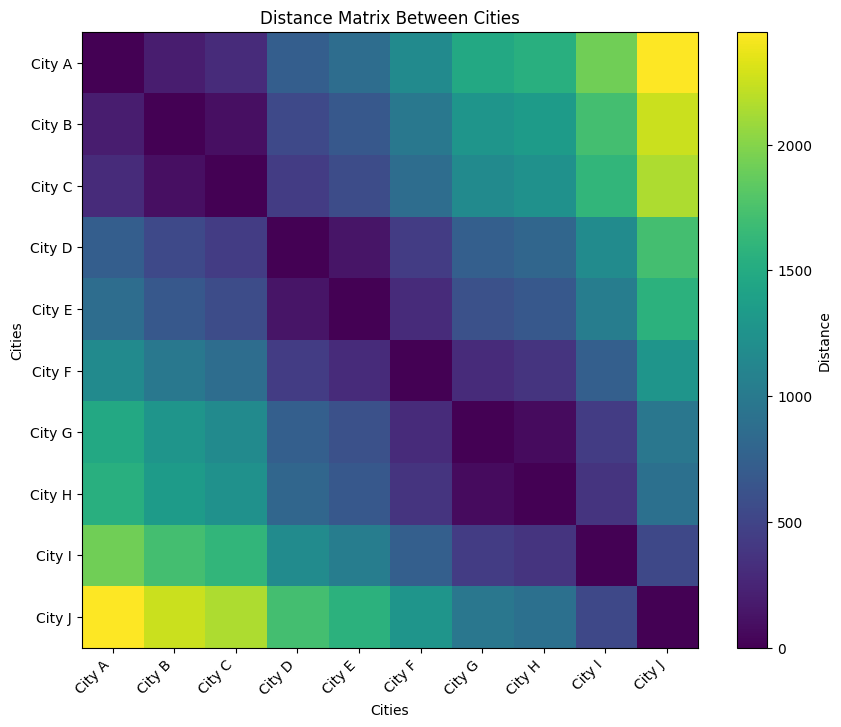

In [19]:
import numpy as np
import matplotlib.pyplot as plt

distances = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
city_names = ['City A', 'City B', 'City C', 'City D', 'City E',
              'City F', 'City G', 'City H', 'City I', 'City J']

distance_matrix = np.abs(distances[:, np.newaxis] - distances)

plt.figure(figsize=(10, 8))
plt.imshow(distance_matrix, cmap='viridis', origin='upper')
cbar = plt.colorbar()
cbar.set_label('Distance')


plt.xticks(np.arange(len(city_names)), city_names, rotation=45, ha='right')
plt.yticks(np.arange(len(city_names)), city_names)

plt.xlabel('Cities')
plt.ylabel('Cities')

plt.title('Distance Matrix Between Cities')

plt.show()


# 5. Assume “T” is a multidimensional list. Suppose we make another variable “Q” equal to “T” and change an element in T. You need to print out Q and T and check what happens. Do they both have the same elements? If so, why? What can we do to Q to not be affected by operations on T?

In [20]:
T = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
Q = list(T)
T[1][0] = 10000

print("T: ",T)
print("Q: ",Q)

#they have same elements

T:  [[1, 2, 3], [10000, 5, 6], [7, 8, 9]]
Q:  [[1, 2, 3], [10000, 5, 6], [7, 8, 9]]


In [21]:
import copy

T = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
Q = copy.deepcopy(T)
T[1][0] = 100000

print("T: ",T)
print("Q: ",Q)
#deepcopy solves the problem

T:  [[1, 2, 3], [100000, 5, 6], [7, 8, 9]]
Q:  [[1, 2, 3], [4, 5, 6], [7, 8, 9]]


# 6. For given two arrays, find
a. The indices as well as the elements in X where the current value is greater
than the corresponding value in Y

b. The indices of elements in X that are equal to elements in Y


In [22]:
import numpy as np

X = np.array([5, 9, 77, 0, 74, 55, 81, 79, 90])
Y = np.array([5, 1, 46, 2, 10, 29, 55, 4, 90])

indices_greater = np.where(X > Y)[0]
elements_greater = X[indices_greater]

print("Indices where X > Y:", indices_greater)
print("Elements where X > Y:", elements_greater)

indices_equal = np.where(X == Y)[0]

print("Indices where X == Y:", indices_equal)


Indices where X > Y: [1 2 4 5 6 7]
Elements where X > Y: [ 9 77 74 55 81 79]
Indices where X == Y: [0 8]


## **Part 2**

## 1. Tensor

100%|██████████| 9912422/9912422 [00:00<00:00, 158258261.05it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 81572857.79it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 37027532.28it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 17820887.53it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



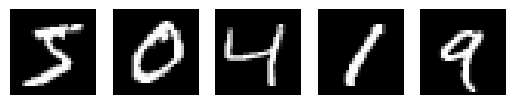

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms

# Download the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=None, download=True)

# Task 1a: Visualize the first 5 numbers in the dataset separately
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(mnist_dataset[i][0], cmap='gray')
    plt.axis('off')
plt.show()


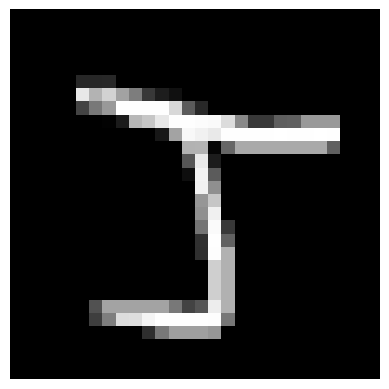

In [24]:
# Task 1b: Visualize the third number rotated counterclockwise
third_image = np.array(mnist_dataset[2][0])
rotated_image = np.flip(third_image.T, 0)
plt.imshow(rotated_image, cmap='gray')
plt.axis('off')
plt.show()



In [25]:
# Task 1c: Create a batch of MNIST digits and flatten it
batch_size = 10
batch_images = np.array([np.array(mnist_dataset[i][0]) for i in range(batch_size)])
flattened_batch = batch_images.flatten()


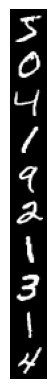

In [26]:
# Task 1d: Visualize all numbers in the batch vertically
plt.imshow(np.reshape(flattened_batch, (-1, np.array(mnist_dataset[0][0]).shape[1])), cmap = 'gray')
plt.axis("off")
plt.show()



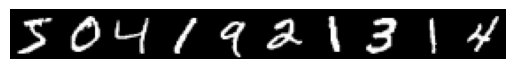

In [27]:
# Task 1e: Visualize all numbers in the batch horizontally
horizontal_collapsed = np.hstack(batch_images)
plt.imshow(horizontal_collapsed, cmap='gray')
plt.axis('off')
plt.show()


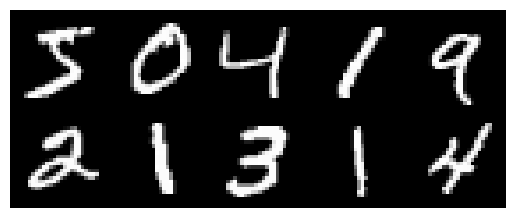

In [28]:
# Task 1f: Split the batch into two new batches and plot horizontally
split_horizontal = np.split(horizontal_collapsed, 2, axis=1)
result = np.vstack(split_horizontal)

plt.imshow(result, cmap='gray')
plt.axis('off')
plt.show()

## 2. MNIST

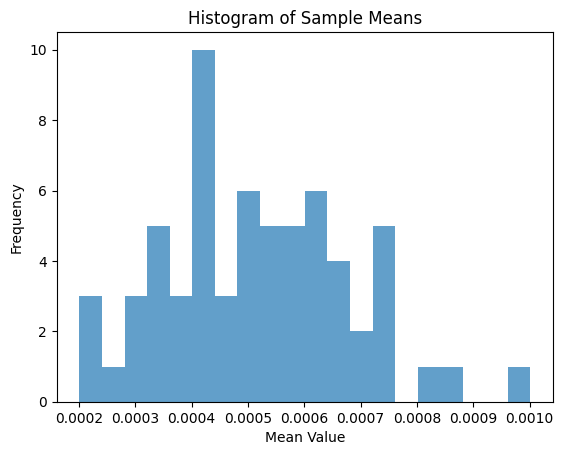

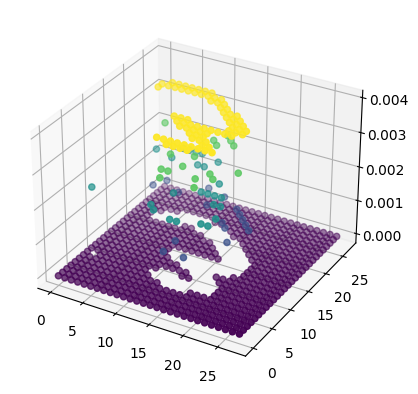

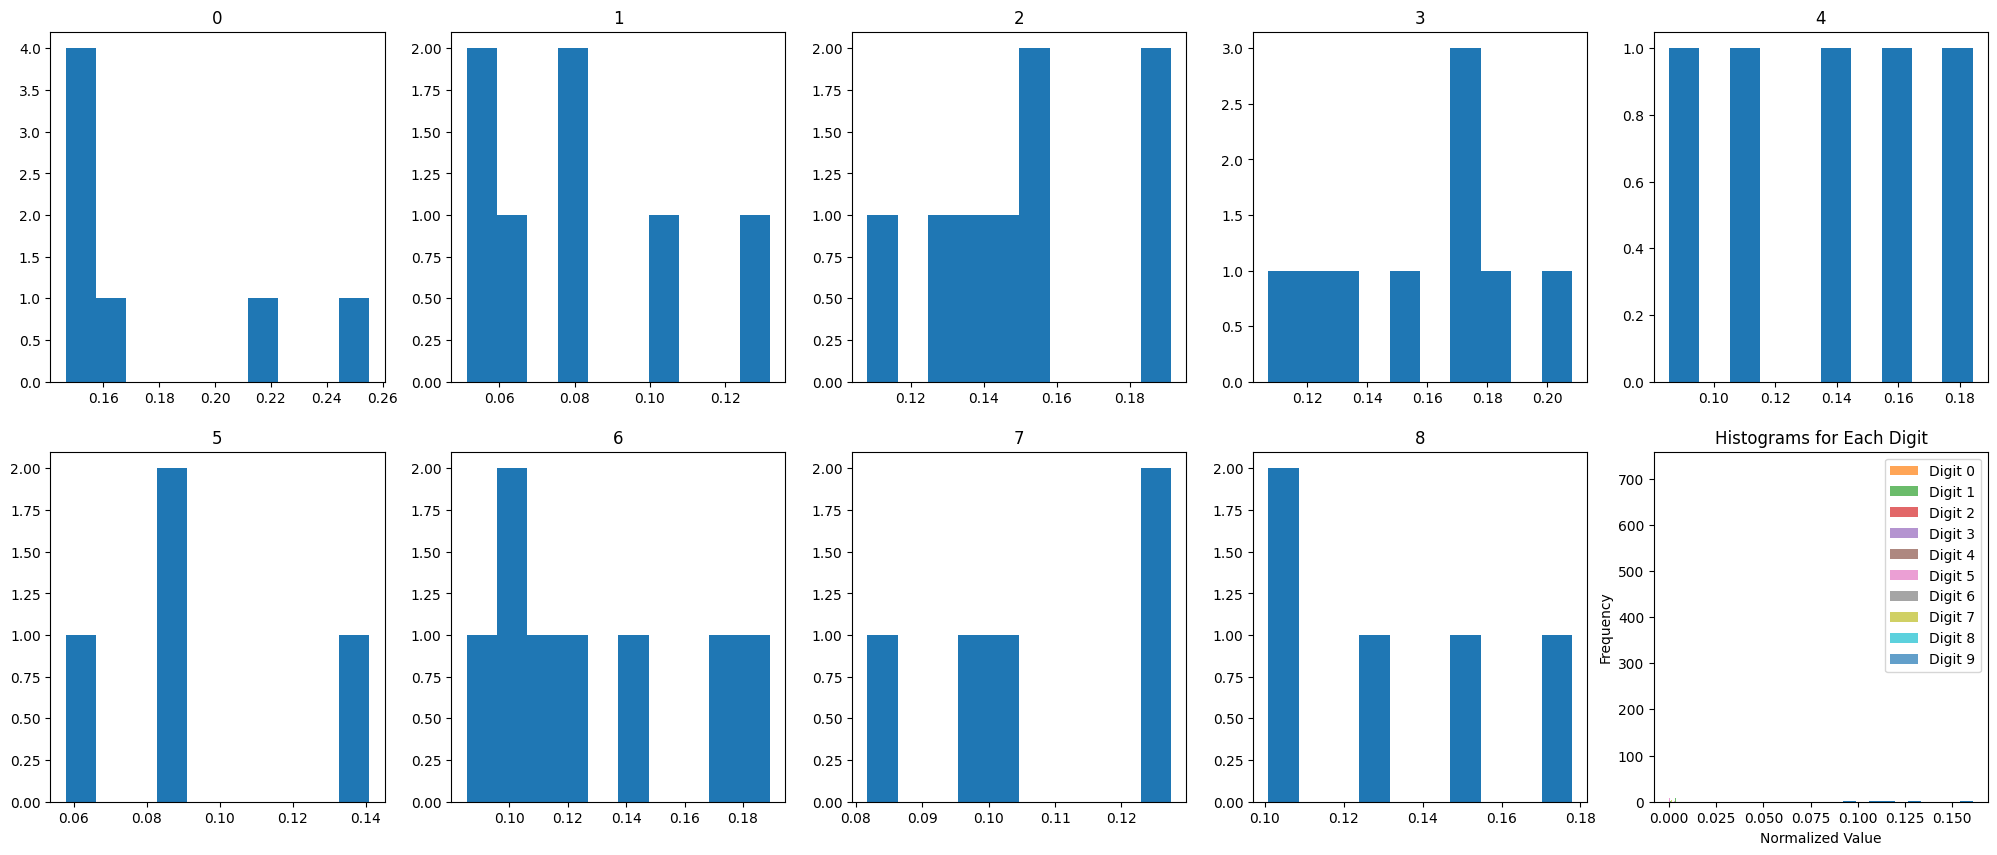

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from mpl_toolkits.mplot3d import Axes3D

# Load MNIST dataset
mnist_transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=mnist_transform, download=True)
dataloader = torch.utils.data.DataLoader(mnist_dataset, batch_size=64, shuffle=True)

data, labels = next(iter(dataloader))

# Normalize data to [0, 1]
data_normalized = data.view(data.size(0), -1)/ 255.0

# Find mean of each sample
sample_means = torch.mean(data_normalized, dim=1)

# Plot histogram of means
plt.hist(sample_means, bins=20, alpha=0.7)
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Means')
plt.show()

# Create a 3D plot of a single MNIST digit

sample_digit = data_normalized[0].view(28, 28)
x, y = np.meshgrid(np.arange(28), np.arange(28))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, sample_digit, c=sample_digit.ravel(), cmap='viridis')
plt.show()

# Order samples by digit
sorted_indices = torch.argsort(labels, dim=0)
data_sorted = data_normalized[sorted_indices]

# Plot histograms for each individual digit
fig,ax = plt.subplots(2,5, figsize=(25, 10))
for i in range(10):
    ax[i//5, i%5].hist([np.mean(np.array(data[j,:,:,:])) for j in range(len(data)) if labels[j] == i])
    ax[i//5, i%5].set_title(i)

# Combine histograms into a single plot with legend
plt.hist(data_sorted, bins=20, alpha=0.7, label=[f'Digit {i}' for i in range(10)])
plt.xlabel('Normalized Value')
plt.ylabel('Frequency')
plt.title('Histograms for Each Digit')
plt.legend()
plt.show()

# Normalize each image in a batch by its corresponding mean
normalized_batch = data_normalized / sample_means[:, None]


## **Part 3.**

In [30]:
# 1. Examples Where Specific Data Structures are Most Useful
# Lists - Dynamic Arrays: Lists are ideal for situations where you need to maintain an ordered collection of items that can change in size, like a dynamic array. This is not efficient with tuples due to immutability, or with sets and dictionaries because they don't maintain order.
# Sets - Unique Element Storage: Sets are the best choice for storing unique elements and performing set operations like union, intersection, and difference. This is not efficient with lists and tuples due to their allowance of duplicates, and dictionaries aren't suitable for this use case as they focus on key-value pairs.
# Tuples - Immutable Collections: Tuples are useful when you need a collection of items that should not be changed (immutable), like a set of constants. Lists and dictionaries are mutable and sets do not maintain the order of elements.
# Dicts - Key-Value Mapping: Dictionaries are ideal for situations where items need to be retrieved quickly based on a unique key, such as a phone book application. This is not efficient with lists and tuples due to the need to iterate over elements to find a match, and sets only store unique keys without associated values.

In [31]:
# 2. Single responsibility principle
class Logger:
    def log(self, message):
        print(f"Log: {message}")

class Calculator:
    def __init__(self):
        self.logger = Logger()

    def add(self, a, b):
        result = a + b
        self.logger.log(f"Adding: {a} + {b} = {result}")
        return result

In [32]:
# Open-Closed Principle
class Shape:
    def area(self):
        pass

class Rectangle(Shape):
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def area(self):
        return self.width * self.height

In [33]:
#Liskov Substitution Principle
class Bird:
    def fly(self):
        pass

class Duck(Bird):
    def fly(self):
        print("Duck flying")

class Ostrich(Bird):
    def fly(self):
        raise NotImplementedError("Ostrich can't fly")

In [34]:
# Interface Segregation Principle
from abc import ABC, abstractmethod

class Printer(ABC):
    @abstractmethod
    def print_document(self, document):
        pass

class Scanner(ABC):
    @abstractmethod
    def scan_document(self, document):
        pass

class MultiFunctionPrinter(Printer, Scanner):
    def print_document(self, document):
        # Print logic
        pass

    def scan_document(self, document):
        # Scan logic
        pass

In [35]:
# Dependency Inversion Principle
class LightBulb:
    def turn_on(self):
        print("LightBulb: turned on")

class Switch:
    def __init__(self, bulb):
        self.bulb = bulb

    def operate(self):
        self.bulb.turn_on()

In [36]:
# Garbage collection

import sys
import gc

class MyClass:
    def __init__(self, name):
        self.name = name

    def __del__(self):
        print(f"{self.name} has been deleted")

def main():
    # Create an instance of MyClass
    my_object = MyClass("Object1")

    # Display the current reference count for my_object
    print(f"Initial reference count: {sys.getrefcount(my_object)}")

    # Increase the reference count
    references = [my_object, my_object]
    print(f"Increased reference count: {sys.getrefcount(my_object)}")

    # Delete one reference
    del references[0]
    print(f"Reference count after deleting one reference: {sys.getrefcount(my_object)}")

    # Manually trigger garbage collection
    print("Triggering garbage collection...")
    gc.collect()
    print(f"Reference count after garbage collection: {sys.getrefcount(my_object)}")

if __name__ == "__main__":
    main()


Initial reference count: 2
Increased reference count: 4
Reference count after deleting one reference: 3
Triggering garbage collection...
Reference count after garbage collection: 3
Object1 has been deleted


In [37]:
# Image resize

from PIL import Image
import os

def resize_and_save_image(file_path, output_size=(224, 224)):
    try:
        # Open the image file
        with Image.open(file_path) as img:
            # Resize the image
            resized_img = img.resize(output_size)

            # Create a new file name
            file_root, file_ext = os.path.splitext(file_path)
            new_file_name = f"{file_root}_resized.JPG"

            # Save the resized image
            resized_img.save(new_file_name)
            print(f"Image saved as {new_file_name}")
    except IOError:
        print("Error: Unable to open or process the file. Please check the file path and format.")

def main():
    file_path = input("Enter image file name: ")
    if os.path.exists(file_path):
        resize_and_save_image(file_path)
    else:
        print("Error: The file does not exist. Please check the file path.")

if __name__ == "__main__":
    main()



Enter image file name: 43.onf
Error: The file does not exist. Please check the file path.


In [38]:
# MNIST
import tensorflow as tf
import numpy as np
import h5py
import pickle
import scipy.io
import os

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, _), (_, _) = mnist.load_data()

# Select first 100 images
data = train_images[:100]

# Save in HDF5 format
with h5py.File('data.h5', 'w') as f:
    f.create_dataset('dataset', data=data)

# Save in NumPy formats (npy and npz)
np.save('data.npy', data)
np.savez('data.npz', data)

# Save in Pickle format
with open('data.pkl', 'wb') as f:
    pickle.dump(data, f)

# Save in MATLAB format
scipy.io.savemat('data.mat', {'data': data})

# Function to get file size
def get_file_size(file_path):
    return os.path.getsize(file_path)

# Report file sizes
formats = ['h5', 'npy', 'npz', 'pkl', 'mat']
for fmt in formats:
    size = get_file_size(f'data.{fmt}')
    print(f"Size of data.{fmt}: {size} bytes")


Size of data.h5: 80448 bytes
Size of data.npy: 78528 bytes
Size of data.npz: 78664 bytes
Size of data.pkl: 78563 bytes
Size of data.mat: 78592 bytes
